In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import torch
import torch.nn as nn

from torch.utils.data import DataLoader 
from torchvision import datasets,transforms

import os
import matplotlib.pyplot as plt

In [ ]:
train_transformer=transforms.Compose([
              transforms.Resize((256,256)),
              transforms.ToTensor()
])

In [ ]:
test_transformer=transforms.Compose([
              transforms.Resize((256,256)),
              transforms.ToTensor(),
])

In [ ]:
class_names=["NOT WEED","WEED"]

In [ ]:
base_path='/content/drive/MyDrive/DATASETS/'

training_data=datasets.ImageFolder(os.path.join(base_path,'TRAIN'),transform=train_transformer)
testing_data=datasets.ImageFolder(os.path.join(base_path,'TEST'),transform=test_transformer)

In [ ]:
training_loader=DataLoader(training_data,batch_size=32,shuffle=True)
testing_loader=DataLoader(testing_data,batch_size=32)

In [ ]:
class Network(nn.Module):
  def __init__(self):
    super(Network,self).__init__()

    self.conv_layer1=nn.Conv2d(in_channels=3,out_channels=6,kernel_size=3,stride=1,padding=1)
    self.batchnorm1=nn.BatchNorm2d(6)

    self.conv_layer2=nn.Conv2d(in_channels=6,out_channels=9,kernel_size=3,stride=1,padding=1)
    self.batchnorm2=nn.BatchNorm2d(9)

    self.conv_layer3=nn.Conv2d(in_channels=9,out_channels=12,kernel_size=3,stride=1,padding=1)
    self.batchnorm3=nn.BatchNorm2d(12)

    
    self.conv_layer4=nn.Conv2d(in_channels=12,out_channels=16,kernel_size=3,stride=1,padding=1)
    self.batchnorm4=nn.BatchNorm2d(16)

    
    self.conv_layer5=nn.Conv2d(in_channels=16,out_channels=32,kernel_size=3,stride=1,padding=1)
    self.batchnorm5=nn.BatchNorm2d(32)

    

    self.fully_connected1=nn.Linear(8*8*32,256)
    self.fully_connected2=nn.Linear(256,64)
    self.fully_connected3=nn.Linear(64,2)

    self.dropout_layer=nn.Dropout(p=0.5)

    self.relu_layer=nn.ReLU()
    self.maxpool_layer=nn.MaxPool2d(kernel_size=2)

  def forward(self,input):

    output=self.conv_layer1(input)
    output=self.batchnorm1(output)
    output=self.relu_layer(output)
    output=self.maxpool_layer(output)

    output=self.conv_layer2(output)
    output=self.batchnorm2(output)
    output=self.relu_layer(output)
    output=self.maxpool_layer(output)

    output=self.conv_layer3(output)
    output=self.batchnorm3(output)
    output=self.relu_layer(output)
    output=self.maxpool_layer(output)

    output=self.conv_layer4(output)
    output=self.batchnorm4(output)
    output=self.relu_layer(output)
    output=self.maxpool_layer(output)

    output=self.conv_layer5(output)
    output=self.batchnorm5(output)
    output=self.relu_layer(output)
    output=self.maxpool_layer(output)

    output=output.view(-1,8*8*32)

    output=self.fully_connected1(output)
    output=self.relu_layer(output)
    output=self.dropout_layer(output)

    output=self.fully_connected2(output)
    output=self.relu_layer(output)
    output=self.dropout_layer(output)
    
    output=self.fully_connected3(output)

    return output

In [ ]:
model=Network()
loss_function=nn.CrossEntropyLoss() 
optimizer=torch.optim.Adam(model.parameters(),lr=0.001)

In [ ]:
epochs=50
training_loss=[]
training_accuracy=[]
testing_loss=[]
testing_accuracy=[]

In [ ]:
for epoch in range(epochs):

  correct_count=0
  iterations=0
  iter_loss=0.0

  model.train()

  for index,(inputs,labels) in enumerate(training_loader):
    
    output=model(inputs)
    
    loss=loss_function(output,labels)
    iter_loss+=loss.item()

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    _, predictions=torch.max(output,1)


    
    correct_count+=(predictions==labels).sum()
    iterations+=1

  training_loss.append(iter_loss/iterations)
  training_accuracy.append(100*correct_count/len(training_data))


  testing_lossval=0.0
  correct_count=0
  iterations=0

  model.eval()

  print()
  for index,(inputs,labels) in enumerate(testing_loader):
      

      output=model(inputs)
      loss=loss_function(output,labels)    
      testing_lossval+=loss.item()
      
      _, predictions=torch.max(output,1)
      correct_count+=(predictions==labels).sum()
      iterations+=1
      
  testing_loss.append(testing_lossval/iterations)
  testing_accuracy.append(100*correct_count/len(testing_data))
  print()
  print("Epoch {}/{}, Training Loss {:.3f}, Training Accuracy:{:.3f},  Testing Loss:{:.3f}, Testing Accuracy:{:.3f}".format(epoch+1,epochs,training_loss[-1],training_accuracy[-1],testing_loss[-1],testing_accuracy[-1]))

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)




Epoch 1/50, Training Loss 0.640, Training Accuracy:63.583,  Testing Loss:0.514, Testing Accuracy:84.219


Epoch 2/50, Training Loss 0.539, Training Accuracy:75.708,  Testing Loss:0.524, Testing Accuracy:79.688


Epoch 3/50, Training Loss 0.504, Training Accuracy:77.750,  Testing Loss:0.421, Testing Accuracy:85.312


Epoch 4/50, Training Loss 0.468, Training Accuracy:80.208,  Testing Loss:0.361, Testing Accuracy:85.625


Epoch 5/50, Training Loss 0.450, Training Accuracy:80.458,  Testing Loss:0.349, Testing Accuracy:85.938


Epoch 6/50, Training Loss 0.415, Training Accuracy:82.542,  Testing Loss:0.311, Testing Accuracy:88.125


Epoch 7/50, Training Loss 0.386, Training Accuracy:83.500,  Testing Loss:0.390, Testing Accuracy:83.906


Epoch 8/50, Training Loss 0.383, Training Accuracy:83.625,  Testing Loss:0.308, Testing Accuracy:87.188


Epoch 9/50, Training Loss 0.383, Training Accuracy:84.792,  Testing Loss:0.383, Testing Accuracy:83.594


Epoch 10/50, Training Loss 0.361, Training A

In [ ]:
torch.save(model.state_dict(),'/content/drive/MyDrive/weed_detection_model.pth')

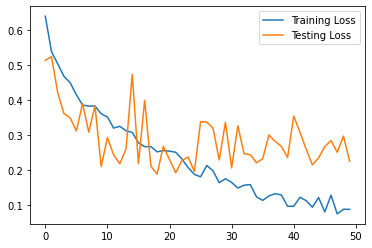

In [ ]:
plt.plot(training_loss,label="Training Loss")
plt.plot(testing_loss,label="Testing Loss")
plt.legend()
plt.show()

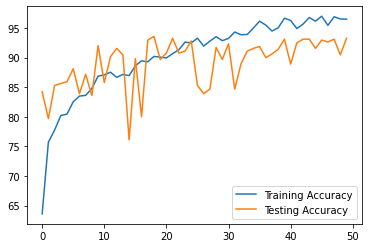

In [ ]:
plt.plot(training_accuracy,label="Training Accuracy")
plt.plot(testing_accuracy,label="Testing Accuracy")
plt.legend()
plt.show()